# Get Raw data from www.champsorchump.us

**It could take some time to complete**

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Define the NBA teams
nba_teams = [
    'atlanta-hawks', 'boston-celtics', 'brooklyn-nets', 'charlotte-hornets',
    'chicago-bulls', 'cleveland-cavaliers', 'dallas-mavericks', 'denver-nuggets',
    'detroit-pistons', 'golden-state-warriors', 'houston-rockets', 'indiana-pacers',
    'los-angeles-clippers', 'los-angeles-lakers', 'memphis-grizzlies', 'miami-heat',
    'milwaukee-bucks', 'minnesota-timberwolves', 'new-orleans-pelicans', 'new-york-knicks',
    'oklahoma-city-thunder', 'orlando-magic', 'philadelphia-76ers', 'phoenix-suns',
    'portland-trail-blazers', 'sacramento-kings', 'san-antonio-spurs', 'toronto-raptors',
    'utah-jazz', 'washington-wizards'
]

# HTML table rows process
def process_game_row(tr, team):
    date = tr.find('td', class_='text-center').get_text(strip=True)
    opponent_td = tr.find_all('td', class_='text-center')[1]
    opponent_raw = opponent_td.get_text(strip=True)
    score = tr.find_all('td', class_='text-center')[2].get_text(strip=True)
    is_playoff = opponent_td.find('span', class_='fa fa-bolt') is not None
    type = "Playoff" if is_playoff else "Regular"
    win_loss = "Win" if 'W' in score else "Loss"
    team1 = team.replace('-', ' ')
    opponent = opponent_raw.replace('@ ', '').replace('vs ', '').replace('-', ' ')
    
    ot_game = 0  # Default to no OT
    expanding_td = tr.find('td', class_='expanding')
    if expanding_td and 'OT' in expanding_td.text:
        ot_game = 1  # Mark as OT game

    return {
        'Date': date, 'Score': score, 'Win': win_loss, 'Type': type,
        'Team1': team1, 'Team2': opponent, 'OT': ot_game
    }

# Data scrape year
def scrape_data_for_year(team, year):
    headers = {'User-Agent': 'Mozilla/5.0'}
    url = f"https://champsorchumps.us/team/nba/{team}/{year}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        target_div = soup.find('div', class_='col-md-12 col-lg-8')
        if target_div:
            game_rows = target_div.find_all('tr', id=lambda x: x and x.startswith('game_'))
            print(f"Scraping data for {team}. Year {year}.")
            return [process_game_row(tr, team) for tr in game_rows if tr.find('td', class_='text-center')]
    else:
        print(f"Failed to retrieve the web page for year {year}. Status code: {response.status_code}")
        return []

# Data scrape team
def scrape_data_for_team(team, start_year, end_year):
    all_games_data = []
    for year in range(start_year, end_year + 1):
        yearly_data = scrape_data_for_year(team, year)
        all_games_data.extend(yearly_data)
        time.sleep(1)  # Delay
    return pd.DataFrame(all_games_data)

# User promt
team_selection = input("Enter 'all' for all teams or specify a team (e.g., 'los-angeles-clippers'): ").strip().lower().replace(' ', '-')
start_year = int(input("Enter your start year: "))
end_year = int(input("Enter your end year: "))

master_df = pd.DataFrame()

# Handle all
if team_selection == 'all':
    for team in nba_teams:
        df = scrape_data_for_team(team, start_year, end_year)
        master_df = pd.concat([master_df, df], ignore_index=True)
else:
    if team_selection in nba_teams:
        master_df = scrape_data_for_team(team_selection, start_year, end_year)
    else:
        print("Team not found. Please ensure you've entered the team name correctly.")

# Remove rows with an empty 'Score' column
master_df = master_df[master_df['Score'].str.strip() != '']

# Data post-processing
master_df['Win'] = master_df['Win'].apply(lambda x: 1 if x == 'Win' else 0)
master_df['Type'] = master_df['Type'].apply(lambda x: 1 if x == 'Playoff' else 0)

# Show head
print(master_df.head())

# Export to CSV
csv_file_name = f"nba_data_{start_year}_to_{end_year}.csv"
master_df.to_csv(csv_file_name, index=False)
print(f"CSV file generated: {csv_file_name}")

Enter 'all' for all teams or specify a team (e.g., 'los-angeles-clippers'):  all
Enter your start year:  2024
Enter your end year:  2024


Scraping data for atlanta-hawks. Year 2024.
Scraping data for boston-celtics. Year 2024.
Scraping data for brooklyn-nets. Year 2024.
Scraping data for charlotte-hornets. Year 2024.
Scraping data for chicago-bulls. Year 2024.
Scraping data for cleveland-cavaliers. Year 2024.
Scraping data for dallas-mavericks. Year 2024.
Scraping data for denver-nuggets. Year 2024.
Scraping data for detroit-pistons. Year 2024.
Scraping data for golden-state-warriors. Year 2024.
Scraping data for houston-rockets. Year 2024.
Scraping data for indiana-pacers. Year 2024.
Scraping data for los-angeles-clippers. Year 2024.
Scraping data for los-angeles-lakers. Year 2024.
Scraping data for memphis-grizzlies. Year 2024.
Scraping data for miami-heat. Year 2024.
Scraping data for milwaukee-bucks. Year 2024.
Scraping data for minnesota-timberwolves. Year 2024.
Scraping data for new-orleans-pelicans. Year 2024.
Scraping data for new-york-knicks. Year 2024.
Scraping data for oklahoma-city-thunder. Year 2024.
Scrapin

# Adjust the format and add features

In [5]:
import pandas as pd
import numpy as np

# Sample dictionary for mapping team names to their IDs
teams_id = {
    'atlantahawks': 1610612737, 'bostonceltics': 1610612738, 'clevelandcavaliers': 1610612739,
    'neworleanspelicans': 1610612740, 'chicagobulls': 1610612741, 'dallasmavericks': 1610612742,
    'denvernuggets': 1610612743, 'goldenstatewarriors': 1610612744, 'houstonrockets': 1610612745,
    'losangelesclippers': 1610612746, 'losangeleslakers': 1610612747, 'miamiheat': 1610612748,
    'milwaukeebucks': 1610612749, 'minnesotatimberwolves': 1610612750, 'brooklynnets': 1610612751,
    'newyorkknicks': 1610612752, 'orlandomagic': 1610612753, 'indianapacers': 1610612754,
    'philadelphia76ers': 1610612755, 'phoenixsuns': 1610612756, 'portlandtrailblazers': 1610612757,
    'sacramentokings': 1610612758, 'sanantoniospurs': 1610612759, 'oklahomacitythunder': 1610612760,
    'torontoraptors': 1610612761, 'utahjazz': 1610612762, 'memphisgrizzlies': 1610612763,
    'washingtonwizards': 1610612764, 'detroitpistons': 1610612765, 'charlottehornets': 1610612766,
}

# Load the dataset
df = pd.read_csv('nba_data_2024_to_2024.csv')

# Normalize team names function
def normalize_team_name(name):
    name = name.lower().replace(" ", "")
    return teams_id.get(name, "Unknown")

# Normalize 'Team1' and 'Team2' columns
df['Team1'] = df['Team1'].apply(normalize_team_name)

# Remove '@' and 'vs' from 'Team2' and convert to IDs
df['Team2'] = df['Team2'].apply(lambda x: x.replace('@', '').replace('vs', '').strip())
df['Team2'] = df['Team2'].apply(normalize_team_name)

# Convert 'Date' into datetime format and extract year, month, day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Ensure 'Date' is in datetime format if needed
#df['Date'] = pd.to_datetime(df['Date'])

# Extract and process scores
score_pattern = r'(\d{2,3})\s*[-–]\s*(\d{2,3})'
scores = df['Score'].str.extract(score_pattern)
df['Team1_Score'] = scores.iloc[:, 0].astype(float)
df['Team2_Score'] = scores.iloc[:, 1].astype(float)
df['Score'] = df['Score'].str.extract('(\d{2,3}\s*[-–]\s*\d{2,3})')[0]

# Calculate average score for each team in "Team1"
df['Avg_Score'] = df.groupby('Team1')['Team1_Score'].transform('mean')

# Calculate win ratio for each team in "Team1"
df['Avg_Win_Ratio'] = df.groupby('Team1')['Win'].transform('mean')

# Initialize dictionaries to hold win/loss counts for regular and playoff games
regular_games = {}
playoff_games = {}

# Iterate through each row to count wins/losses
for index, row in df.iterrows():
    team_id = row['Team1']
    game_type = 'playoff' if row['Type'] == 1 else 'regular'
    win = row['Win'] == 1
    
    # Initialize team record in dictionaries if not already present
    if team_id not in regular_games:
        regular_games[team_id] = {'wins': 0, 'losses': 0}
    if team_id not in playoff_games:
        playoff_games[team_id] = {'wins': 0, 'losses': 0}
    
    # Increment win/loss count based on game type
    if game_type == 'regular':
        if win:
            regular_games[team_id]['wins'] += 1
        else:
            regular_games[team_id]['losses'] += 1
    elif game_type == 'playoff':
        if win:
            playoff_games[team_id]['wins'] += 1
        else:
            playoff_games[team_id]['losses'] += 1

# Calculate win ratios for regular and playoff games
regular_win_ratios = {team_id: record['wins'] / (record['wins'] + record['losses']) for team_id, record in regular_games.items() if (record['wins'] + record['losses']) > 0}
playoff_win_ratios = {team_id: record['wins'] / (record['wins'] + record['losses']) for team_id, record in playoff_games.items() if (record['wins'] + record['losses']) > 0}

# Convert win ratio dictionaries to DataFrames for easy merging
regular_win_ratios_df = pd.DataFrame(list(regular_win_ratios.items()), columns=['Team1', 'Regular_Win_Ratio'])
playoff_win_ratios_df = pd.DataFrame(list(playoff_win_ratios.items()), columns=['Team1', 'Playoff_Win_Ratio'])

# Merge win ratios back to the original DataFrame
df = pd.merge(df, regular_win_ratios_df, on='Team1', how='left')
df = pd.merge(df, playoff_win_ratios_df, on='Team1', how='left')

# Calculate the absolute score difference
df['Score_Difference'] = abs(df['Team1_Score'] - df['Team2_Score'])

# Normalize the score difference to a similarity score (0 to 1)
max_diff = df['Score_Difference'].max()
df['Similarity_Score'] = 1 - (df['Score_Difference'] / max_diff)

# Drop columns if they're no longer needed
df.drop(['Score_Difference', 'Score', 'Date'], axis=1, inplace=True)

# Calculate the global average scores for teams as both 'Team1' and 'Team2'
global_avg_scores = pd.concat([
    df.groupby('Team1')['Team1_Score'].mean(),
    df.groupby('Team2')['Team2_Score'].mean()
]).groupby(level=0).mean()

# Function to calculate avg_score_diff for each matchup
def calculate_avg_score_diff(row):
    team1_avg_score = global_avg_scores.get(row['Team1'])
    team2_avg_score = global_avg_scores.get(row['Team2'])
    return team1_avg_score - team2_avg_score if team1_avg_score and team2_avg_score else None

# Apply the function to each row
df['Avg_point_diff'] = df.apply(calculate_avg_score_diff, axis=1)



# Fill empty values with 0 for the entire DataFrame
df.fillna(0, inplace=True)

# Display the first few rows to verify the calculations
print(df.head())

# save the updated DataFrame to a CSV file
save_confirmation = input("Do you want to save the updated data to a CSV file? (yes/no): ").strip().lower()
if save_confirmation == 'yes':
    csv_file_name = input("Enter the name for the CSV file (e.g., 'updated_nba_data.csv'): ").strip()
    df.to_csv(csv_file_name, index=False)
    print(f"Updated data saved to '{csv_file_name}'.")


   Win  Type       Team1       Team2  OT  Year  Month  Day  Team1_Score  \
0    0     0  1610612737  1610612766   0  2023     10   25        110.0   
1    0     0  1610612737  1610612752   0  2023     10   27        120.0   
2    1     0  1610612737  1610612749   0  2023     10   29        127.0   
3    1     0  1610612737  1610612750   0  2023     10   30        127.0   
4    1     0  1610612737  1610612764   0  2023     11    1        130.0   

   Team2_Score   Avg_Score  Avg_Win_Ratio  Regular_Win_Ratio  \
0        116.0  121.653846       0.442308           0.442308   
1        126.0  121.653846       0.442308           0.442308   
2        110.0  121.653846       0.442308           0.442308   
3        113.0  121.653846       0.442308           0.442308   
4        121.0  121.653846       0.442308           0.442308   

   Playoff_Win_Ratio  Similarity_Score  Avg_point_diff  
0                  0          0.903226       13.438160  
1                  0          0.903226        6.59

Do you want to save the updated data to a CSV file? (yes/no):  yes
Enter the name for the CSV file (e.g., 'updated_nba_data.csv'):  updated_nba_2024_data.csv


Updated data saved to 'updated_nba_2024_data.csv'.


# More headers and features

In [15]:
import pandas as pd
import numpy as np

# Sample dictionary for mapping team names to their IDs (Ensure this is filled correctly)
teams_id = {
    'atlantahawks': 1610612737, 'bostonceltics': 1610612738, 'clevelandcavaliers': 1610612739,
    'neworleanspelicans': 1610612740, 'chicagobulls': 1610612741, 'dallasmavericks': 1610612742,
    'denvernuggets': 1610612743, 'goldenstatewarriors': 1610612744, 'houstonrockets': 1610612745,
    'losangelesclippers': 1610612746, 'losangeleslakers': 1610612747, 'miamiheat': 1610612748,
    'milwaukeebucks': 1610612749, 'minnesotatimberwolves': 1610612750, 'brooklynnets': 1610612751,
    'newyorkknicks': 1610612752, 'orlandomagic': 1610612753, 'indianapacers': 1610612754,
    'philadelphia76ers': 1610612755, 'phoenixsuns': 1610612756, 'portlandtrailblazers': 1610612757,
    'sacramentokings': 1610612758, 'sanantoniospurs': 1610612759, 'oklahomacitythunder': 1610612760,
    'torontoraptors': 1610612761, 'utahjazz': 1610612762, 'memphisgrizzlies': 1610612763,
    'washingtonwizards': 1610612764, 'detroitpistons': 1610612765, 'charlottehornets': 1610612766,
}

# Load the dataset
df = pd.read_csv('nba_data_2024_to_2024.csv')

# Function Definitions

def normalize_team_name(name):
    """Normalize team names and map them to IDs."""
    name = name.lower().replace(" ", "")
    return teams_id.get(name, "Unknown")

def calculate_avg_score(team_id, df):
    """Calculate the average score for a given team."""
    team_scores = df[(df['Team1'] == team_id)]['Team1_Score']
    if team_scores.empty:
        return 0
    return team_scores.mean()

def calculate_win_percentage(team_id, df):
    """Calculate the win percentage for a given team."""
    total_games = len(df[(df['Team1'] == team_id)])
    if total_games == 0:
        return 0
    wins = len(df[(df['Team1'] == team_id) & (df['Team1_Score'] > df['Team2_Score'])])
    return (wins / total_games) * 100

def calculate_point_differential(team_id, df):
    """Calculate the point differential for a given team."""
    point_diff = df[(df['Team1'] == team_id)]['Team1_Score'] - df[(df['Team1'] == team_id)]['Team2_Score']
    if point_diff.empty:
        return 0
    return point_diff.mean()

def calculate_performance_metrics(team_id, df, playoff_flag):
    """Calculate wins and losses for a given team based on game type."""
    wins = len(df[(df['Team1'] == team_id) & (df['Win'] == 1) & (df['Type'] == playoff_flag)])
    losses = len(df[(df['Team1'] == team_id) & (df['Win'] == 0) & (df['Type'] == playoff_flag)])
    return wins, losses

def calculate_similarity_score(team1_score, team2_score, max_diff):
    """Calculate similarity score based on score difference."""
    score_difference = abs(team1_score - team2_score)
    return 1 - (score_difference / max_diff)

# Data Preprocessing

# Normalize 'Team1' and 'Team2' columns to team IDs
df['Team1'] = df['Team1'].apply(normalize_team_name)
df['Team2'] = df['Team2'].apply(lambda x: x.replace('@', '').replace('vs', '').strip()).apply(normalize_team_name)

# Convert 'Date' to datetime and extract year, month, day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Extract scores and calculate score difference
score_pattern = r'(\d{2,3})\s*[-–]\s*(\d{2,3})'
scores = df['Score'].str.extract(score_pattern)
df['Team1_Score'] = scores.iloc[:, 0].astype(float)
df['Team2_Score'] = scores.iloc[:, 1].astype(float)
max_score_diff = abs(df['Team1_Score'] - df['Team2_Score']).max()

# Main Calculation Loop

prepared_data = pd.DataFrame()

for team1_input in df['Team1'].unique():
    team1_avg_score = calculate_avg_score(team1_input, df)
    team1_win_percentage = calculate_win_percentage(team1_input, df)
    team1_point_diff = calculate_point_differential(team1_input, df)
    regular_wins_team1, regular_losses_team1 = calculate_performance_metrics(team1_input, df, 0)
    playoff_wins_team1, playoff_losses_team1 = calculate_performance_metrics(team1_input, df, 1)

    for team2_input in df['Team2'].unique():
        if team1_input != team2_input:
            matches_df = df[(df['Team1'] == team1_input) & (df['Team2'] == team2_input)].copy()
            for index, match in matches_df.iterrows():
                similarity_score = calculate_similarity_score(match['Team1_Score'], match['Team2_Score'], max_score_diff)
                matches_df.at[index, 'Similarity_Score'] = similarity_score

            matches_df['Team1_AvgScore'] = team1_avg_score
            matches_df['Team1_WinPercentage'] = team1_win_percentage
            matches_df['Team1_PointDifferential'] = team1_point_diff
            matches_df['Regular_Wins_Team1'] = regular_wins_team1
            matches_df['Regular_Losses_Team1'] = regular_losses_team1
            matches_df['Playoff_Wins_Team1'] = playoff_wins_team1
            matches_df['Playoff_Losses_Team1'] = playoff_losses_team1

            prepared_data = pd.concat([prepared_data, matches_df])


# Check if prepared_data is not empty
if not prepared_data.empty:
    # Display the first few rows of the prepared_data DataFrame
    print("Preview of prepared data:")
    print(prepared_data.head())
else:
    print("No data prepared. Please check the calculation and filtering criteria.")

# Proceed to save only if prepared_data is not empty
if not prepared_data.empty:
    prepared_data.to_csv('enhanced_nba_data_with_calculations.csv', index=False)
    print("Data processing complete. Enhanced dataset saved.")
else:
    print("No data to save.")


Preview of prepared data:
         Date         Score  Win  Type       Team1       Team2  OT  Year  \
0  2023-10-25  Loss110 -116    0     0  1610612737  1610612766   0  2023   
1  2023-10-27  Loss120 -126    0     0  1610612737  1610612752   0  2023   
10 2023-11-15  Loss114 -116    0     0  1610612737  1610612752   0  2023   
2  2023-10-29   Win127- 110    1     0  1610612737  1610612749   0  2023   
18 2023-12-02  Loss121 -132    0     0  1610612737  1610612749   0  2023   

    Month  Day  Team1_Score  Team2_Score  Similarity_Score  Team1_AvgScore  \
0      10   25        110.0        116.0          0.903226      121.653846   
1      10   27        120.0        126.0          0.903226      121.653846   
10     11   15        114.0        116.0          0.967742      121.653846   
2      10   29        127.0        110.0          0.725806      121.653846   
18     12    2        121.0        132.0          0.822581      121.653846   

    Team1_WinPercentage  Team1_PointDifferential

In [ ]:
# LAST USED 

In [31]:
import pandas as pd
import numpy as np

# Sample dictionary for mapping team names to their IDs
teams_id = {
    'atlantahawks': 1610612737, 'bostonceltics': 1610612738, 'clevelandcavaliers': 1610612739,
    'neworleanspelicans': 1610612740, 'chicagobulls': 1610612741, 'dallasmavericks': 1610612742,
    'denvernuggets': 1610612743, 'goldenstatewarriors': 1610612744, 'houstonrockets': 1610612745,
    'losangelesclippers': 1610612746, 'losangeleslakers': 1610612747, 'miamiheat': 1610612748,
    'milwaukeebucks': 1610612749, 'minnesotatimberwolves': 1610612750, 'brooklynnets': 1610612751,
    'newyorkknicks': 1610612752, 'orlandomagic': 1610612753, 'indianapacers': 1610612754,
    'philadelphia76ers': 1610612755, 'phoenixsuns': 1610612756, 'portlandtrailblazers': 1610612757,
    'sacramentokings': 1610612758, 'sanantoniospurs': 1610612759, 'oklahomacitythunder': 1610612760,
    'torontoraptors': 1610612761, 'utahjazz': 1610612762, 'memphisgrizzlies': 1610612763,
    'washingtonwizards': 1610612764, 'detroitpistons': 1610612765, 'charlottehornets': 1610612766,
}

# Load the dataset
df = pd.read_csv('nba_data_2024_to_2024.csv')

# Normalize team names function
def normalize_team_name(name):
    name = name.lower().replace(" ", "")
    return teams_id.get(name, "Unknown")

# Normalize 'Team1' and 'Team2' columns to team IDs
df['Team1'] = df['Team1'].apply(normalize_team_name)
df['Team2'] = df['Team2'].apply(lambda x: x.replace('@', '').replace('vs', '').strip()).apply(normalize_team_name)

# Make sure to convert 'Date' into datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Using errors='coerce' to handle any invalid date formats by converting them to NaT

# Now, you can safely extract year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Extract and process scores
score_pattern = r'(\d{2,3})\s*[-–]\s*(\d{2,3})'
scores = df['Score'].str.extract(score_pattern)
df['Team1_Score'] = scores.iloc[:, 0].astype(float)
df['Team2_Score'] = scores.iloc[:, 1].astype(float)

# Calculate average score for each team
global_avg_scores = pd.concat([
    df.groupby('Team1')['Team1_Score'].mean(),
    df.groupby('Team2')['Team2_Score'].mean()
]).groupby(level=0).mean()

# Calculate win ratio for each team
df['Win'] = (df['Team1_Score'] > df['Team2_Score']).astype(int)
#df['Win'] = df['Team1_Score'] > df['Team2_Score']  # Assuming 'Win' indicates if Team1 won
df['Avg_Win_Ratio'] = df.groupby('Team1')['Win'].transform('mean')

# Calculate the absolute score difference and normalize to a similarity score (0 to 1)
df['Score_Difference'] = abs(df['Team1_Score'] - df['Team2_Score'])
max_diff = df['Score_Difference'].max()
df['Similarity_Score'] = 1 - (df['Score_Difference'] / max_diff)

# Drop unnecessary columns
df.drop(['Score_Difference', 'Score'], axis=1, inplace=True)

# Function to calculate avg_score_diff for each matchup (optional based on your requirements)
def calculate_avg_score_diff(row):
    team1_avg_score = global_avg_scores.get(row['Team1'], 0)
    team2_avg_score = global_avg_scores.get(row['Team2'], 0)
    return team1_avg_score - team2_avg_score if team1_avg_score and team2_avg_score else 0

# Apply the function to each row
df['Avg_Score_Diff'] = df.apply(calculate_avg_score_diff, axis=1)


# Initialize counters for wins and losses
df['Regular_Wins_Team1'] = 0
df['Regular_Losses_Team1'] = 0
df['Playoff_Wins_Team1'] = 0
df['Playoff_Losses_Team1'] = 0

# Iterate through DataFrame to count wins and losses
for index, row in df.iterrows():
    if row['Type'] == 0:  # Regular game
        if row['Win']:
            df.at[index, 'Regular_Wins_Team1'] = 1
        else:
            df.at[index, 'Regular_Losses_Team1'] = 1
    elif row['Type'] == 1:  # Playoff game
        if row['Win']:
            df.at[index, 'Playoff_Wins_Team1'] = 1
        else:
            df.at[index, 'Playoff_Losses_Team1'] = 1

# Group by Team1 and aggregate win/loss counts
agg_functions = {
    'Regular_Wins_Team1': 'sum',
    'Regular_Losses_Team1': 'sum',
    'Playoff_Wins_Team1': 'sum',
    'Playoff_Losses_Team1': 'sum'
}
team_aggregates = df.groupby('Team1').agg(agg_functions).reset_index()

# Merge aggregates back to the original DataFrame
df = pd.merge(df, team_aggregates, on='Team1', suffixes=('', '_total'))

# Drop columns
df = df.drop(['Date', 'Regular_Wins_Team1', 'Regular_Losses_Team1', 'Playoff_Losses_Team1', 'Playoff_Wins_Team1'], axis=1)

# Fill empty values with 0 for the entire DataFrame
df.fillna(0, inplace=True)

# Display the first few rows to verify the calculations
print("Preview of prepared data:")
print(df.head())

# Save the updated DataFrame to a CSV file
save_confirmation = input("Do you want to save the updated data to a CSV file? (yes/no): ").strip().lower()
if save_confirmation == 'yes':
    csv_file_name = input("Enter the name for the CSV file (e.g., 'updated_nba_data.csv'): ").strip()
    df.to_csv(csv_file_name, index=False)
    print(f"Updated data saved to '{csv_file_name}'.")
else:
    print("Data save cancelled.")


Preview of prepared data:
   Win  Type       Team1       Team2  OT  Year  Month  Day  Team1_Score  \
0    0     0  1610612737  1610612766   0  2023     10   25        110.0   
1    0     0  1610612737  1610612752   0  2023     10   27        120.0   
2    1     0  1610612737  1610612749   0  2023     10   29        127.0   
3    1     0  1610612737  1610612750   0  2023     10   30        127.0   
4    1     0  1610612737  1610612764   0  2023     11    1        130.0   

   Team2_Score  Avg_Win_Ratio  Similarity_Score  Avg_Score_Diff  \
0        116.0       0.442308          0.903226       13.438160   
1        126.0       0.442308          0.903226        6.596154   
2        110.0       0.442308          0.725806       -1.251814   
3        113.0       0.442308          0.774194        8.230769   
4        121.0       0.442308          0.854839        6.849925   

   Regular_Wins_Team1_total  Regular_Losses_Team1_total  \
0                        23                          29   
1 

Do you want to save the updated data to a CSV file? (yes/no):  yes
Enter the name for the CSV file (e.g., 'updated_nba_data.csv'):  last2024.csv


Updated data saved to 'last2024.csv'.


# Train the model

**It could take some time to complete**

Adjust one-hot encode categorical features and hyperparameters for prediction improvement 

In [ ]:
# LAST TRAIN

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 8 folds for each of 729 candidates, totalling 5832 fits
Test Metrics:
Accuracy: 0.6235294117647059
ROC AUC: 0.669764010789643
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1468
           1       0.64      0.64      0.64      1592

    accuracy                           0.62      3060
   macro avg       0.62      0.62      0.62      3060
weighted avg       0.62      0.62      0.62      3060



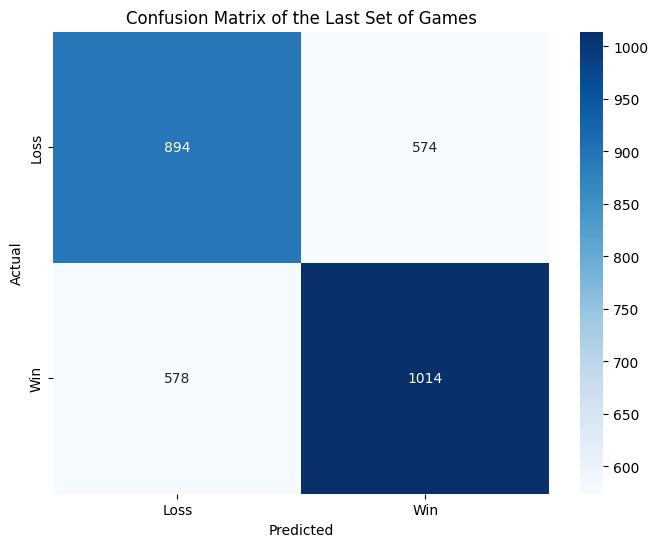

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('updated_nba_2024_data.csv')
# Make sure 'Team1_Score', and 'Team2_Score' columns are dropped for model training and 'Date' if needed 
data.drop(['Team1_Score', 'Team2_Score'], axis=1, inplace=True)

# Prepare features and target
X = data.drop('Win', axis=1)
y = data['Win']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Leaving sparse at its default value to avoid FutureWarning
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
X_categorical = encoder.fit_transform(X[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)

# Replace categorical features with their encoded versions
X_encoded = pd.DataFrame(X_categorical, columns=feature_names)
X_final = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.15, random_state=42)

# Initialize XGBoost model and perform Grid Search for hyperparameter tuning
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
param_grid = {
    'max_depth': [5, 6, 7],
    #'max_depth': [4, 5, 6],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 0.5],
    'reg_lambda': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=8, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred))

# Visualization of the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Last Set of Games')
plt.show()

# Save the trained model and encoder
pickle.dump(best_model, open("xgboost_trained_model_2022.pkl", 'wb'))
pickle.dump(encoder, open("encoder_2022.pkl", 'wb'))

In [ ]:
# Newer train

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 9 folds for each of 729 candidates, totalling 6561 fits
Test Metrics:
Accuracy: 0.6073529411764705
ROC AUC: 0.6539570286154737
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       970
           1       0.63      0.61      0.62      1070

    accuracy                           0.61      2040
   macro avg       0.61      0.61      0.61      2040
weighted avg       0.61      0.61      0.61      2040



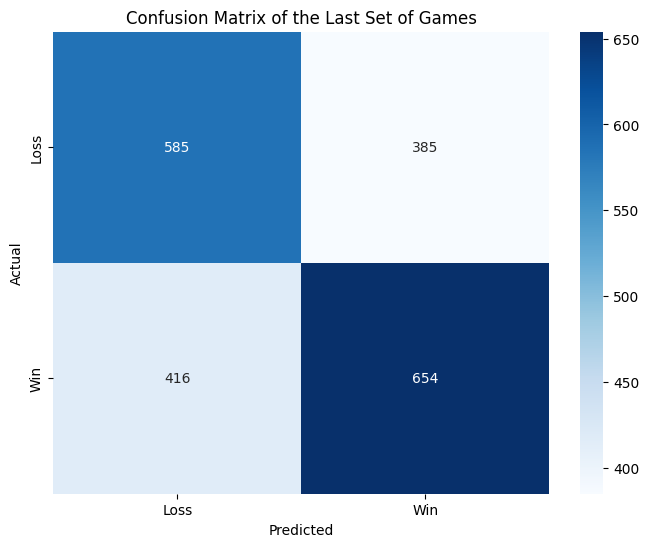

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('updated_nba_2015_2022_data.csv')
# Make sure 'Team1_Score', and 'Team2_Score' columns are dropped for model training and 'Date' if needed 
data.drop(['Team1_Score', 'Team2_Score'], axis=1, inplace=True)

# Prepare features and target
X = data.drop('Win', axis=1)
y = data['Win']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Leaving sparse at its default value to avoid FutureWarning
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
X_categorical = encoder.fit_transform(X[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)

# Replace categorical features with their encoded versions
X_encoded = pd.DataFrame(X_categorical, columns=feature_names)
X_final = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.1, random_state=42)

# Initialize XGBoost model and perform Grid Search for hyperparameter tuning
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
param_grid = {
    'max_depth': [5, 6, 7],
    #'max_depth': [4, 5, 6],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 0.5],
    'reg_lambda': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=9, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred))

# Visualization of the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Last Set of Games')
plt.show()

# Save the trained model and encoder
pickle.dump(best_model, open("xgboost_trained_model_2023.pkl", 'wb'))
pickle.dump(encoder, open("encoder_2023.pkl", 'wb'))

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('updated_nba_data_file.csv')
# Assuming the 'Date', 'Team1_Score', and 'Team2_Score' columns are dropped for model training
data.drop(['Team1_Score', 'Team2_Score'], axis=1, inplace=True)

# Prepare features and target
X = data.drop('Win', axis=1)
y = data['Win']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Leaving sparse at its default value to avoid FutureWarning
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
X_categorical = encoder.fit_transform(X[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)

# Replace categorical features with their encoded versions
X_encoded = pd.DataFrame(X_categorical, columns=feature_names)
X_final = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.22, random_state=42)

# Initialize XGBoost model and perform Grid Search for hyperparameter tuning
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
param_grid = {
    'max_depth': [4, 5, 6],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 0.5],
    'reg_lambda': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=8, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# Save the trained model and encoder
pickle.dump(best_model, open("xgboost_trained_model.pkl", 'wb'))
pickle.dump(encoder, open("encoder.pkl", 'wb'))

# Extracting the last set of games for prediction
last_games = data.tail(100).reset_index(drop=True)

# Preparing features for the last set of games
X_last = last_games.drop(['Win'], axis=1)
y_last_actual = last_games['Win'].values

# One-hot encoding for the last set of games
X_last_categorical = encoder.transform(X_last[categorical_features])
X_last_encoded = pd.DataFrame(X_last_categorical, columns=feature_names)
X_last_final = pd.concat([X_last.drop(categorical_features, axis=1), X_last_encoded], axis=1)

# Making predictions for the last set of games
y_last_pred = best_model.predict(X_last_final)

# Comparing actual outcomes with predictions
comparison = pd.DataFrame({'Actual': y_last_actual, 'Predicted': y_last_pred})
print("Prediction vs Actual for the Last Set of Games:")
print(comparison)

# Calculate and print accuracy for the last set of games
accuracy_last = accuracy_score(y_last_actual, y_last_pred)
print(f"Accuracy for the Last Set of Games: {accuracy_last}")


C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Test Metrics:
Accuracy: 0.6211616722160562
ROC AUC: 0.668498110331248
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      2668
           1       0.63      0.62      0.62      2738

    accuracy                           0.62      5406
   macro avg       0.62      0.62      0.62      5406
weighted avg       0.62      0.62      0.62      5406

Confusion Matrix:
[[1668 1000]
 [1048 1690]]
Prediction vs Actual for the Last Set of Games:
    Actual  Predicted
0        0          1
1        1          0
2        1          0
3        1          0
4        1          1
..     ...        ...
95       1          1
96       0          0
97       0          0
98       0          0
99       0          0

[100 rows x 2 columns]
Accuracy for the Last Set of Games: 0.71


C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Test Metrics:
Accuracy: 0.6131365740740741
ROC AUC: 0.6618232316753985
              precision    recall  f1-score   support

           0       0.61      0.62      0.61      1717
           1       0.62      0.61      0.61      1739

    accuracy                           0.61      3456
   macro avg       0.61      0.61      0.61      3456
weighted avg       0.61      0.61      0.61      3456



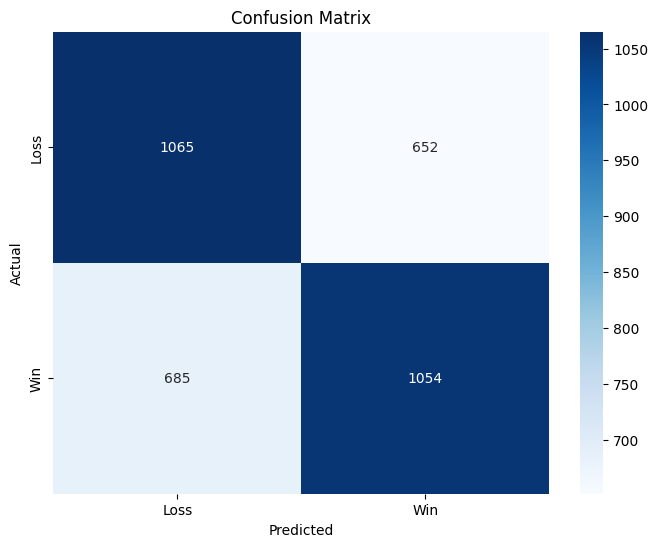

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('last.csv')
# Make sure 'Team1_Score', and 'Team2_Score' columns are dropped for model training and 'Date' if needed 
data.drop(['Team1_Score', 'Team2_Score'], axis=1, inplace=True)

# Prepare features and target
X = data.drop('Win', axis=1)
y = data['Win']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Leaving sparse at its default value to avoid FutureWarning
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
X_categorical = encoder.fit_transform(X[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)

# Replace categorical features with their encoded versions
X_encoded = pd.DataFrame(X_categorical, columns=feature_names)
X_final = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.15, random_state=42)

# Initialize XGBoost model and perform Grid Search for hyperparameter tuning
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
param_grid = {
    'max_depth': [5, 6, 7],
    #'max_depth': [4, 5, 6],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 0.5],
    'reg_lambda': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred))

# Visualization of the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and encoder
pickle.dump(best_model, open("xgboost_trained_model_AdditionalFeaturesCV5.pkl", 'wb'))
pickle.dump(encoder, open("encoder_AdditionalFeaturesCV5.pkl", 'wb'))

In [ ]:
# LAST TRAINNING WITH UPDATED HEADERES 

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 9 folds for each of 729 candidates, totalling 6561 fits
Test Metrics:
Accuracy: 0.6112437594964185
ROC AUC: 0.6582754313343983
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2299
           1       0.61      0.61      0.61      2308

    accuracy                           0.61      4607
   macro avg       0.61      0.61      0.61      4607
weighted avg       0.61      0.61      0.61      4607



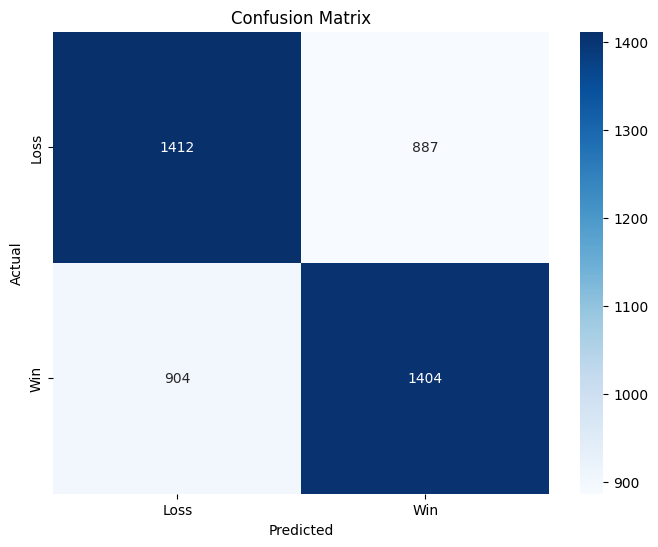

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('last.csv')
# Make sure 'Team1_Score', and 'Team2_Score' columns are dropped for model training and 'Date' if needed 
data.drop(['Team1_Score', 'Team2_Score'], axis=1, inplace=True)

# Prepare features and target
X = data.drop('Win', axis=1)
y = data['Win']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Leaving sparse at its default value to avoid FutureWarning
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
X_categorical = encoder.fit_transform(X[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)

# Replace categorical features with their encoded versions
X_encoded = pd.DataFrame(X_categorical, columns=feature_names)
X_final = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42)

# Initialize XGBoost model and perform Grid Search for hyperparameter tuning
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
param_grid = {
    'max_depth': [5, 6, 7],
    #'max_depth': [4, 5, 6],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 0.5],
    'reg_lambda': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=9, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred))

# Visualization of the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and encoder
pickle.dump(best_model, open("xgboost_trained_model_AdditionalFeaturesNEW.pkl", 'wb'))
pickle.dump(encoder, open("encoder_AdditionalFeaturesNEW.pkl", 'wb'))

In [ ]:
# WITH SMOTE

In [52]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from sklearn.model_selection import GridSearchCV

# Load your dataset
data = pd.read_csv('last.csv')

data.drop(['Team1_Score', 'Team2_Score'], axis=1, inplace=True)

# Assuming 'Win' is your target variable and the rest are features
X = data.drop('Win', axis=1)
y = data['Win']

# Encoding categorical features
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]))
X_encoded.columns = encoder.get_feature_names_out(categorical_features)
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

# Calculate the scale_pos_weight value for handling class imbalance
scale_pos_weight = len(y_sm[y_sm == 0]) / len(y_sm[y_sm == 1])

# Initialize the XGBoost model with class weight adjustment
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Cross-validation to evaluate model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_sm, y_sm, cv=cv, scoring='roc_auc')

print(f"AUC-ROC scores for the folds: {scores}")
print(f"Mean AUC-ROC score: {np.mean(scores)}")

final_model = grid_search.best_estimator_

# Save the final model and encoder for future predictions
pickle.dump(final_model, open('final_xgboost_model.pkl', 'wb'))
pickle.dump(encoder, open('final_encoder.pkl', 'wb'))

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AUC-ROC scores for the folds: [0.65767442 0.62836429 0.64126648 0.62853995 0.65071479]
Mean AUC-ROC score: 0.6413119847493006


# Prediction

In [ ]:
# Last

In [65]:
import pandas as pd
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-trained model and encoder
with open('final_xgboost_model.pkl', 'rb') as file:
    model = pickle.load(file)
with open('final_encoder.pkl', 'rb') as file:
    encoder: OneHotEncoder = pickle.load(file)

# Load the new dataset
data = pd.read_csv('last2024.csv')

# Preprocess the data
# Ensure the categorical features are the same as during training
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
data[categorical_features] = data[categorical_features].astype(str)  # Convert to string

# Select the last 100 games
data_sampled = data.tail(100)

# Encode the categorical features using the loaded encoder
X_categorical = data_sampled[categorical_features]
X_categorical_encoded = encoder.transform(X_categorical)  # No error should occur with handle_unknown='ignore'
feature_names = encoder.get_feature_names_out()
X_encoded = pd.DataFrame(X_categorical_encoded, columns=feature_names)

# Assuming all necessary features for prediction are included in the encoded features
X_final = X_encoded

# Predict the outcomes with the pre-trained model
y_pred = model.predict(X_final)

# Output predictions (if 'Win' column is available, evaluate the predictions)
if 'Win' in data_sampled:
    y_true = data_sampled['Win'].values
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Display evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

    # Plotting the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Predicted NBA Game Outcomes')
    plt.show()
else:
    print("Predictions completed. 'Win' column not available for evaluation metrics.")


ValueError: Found unknown categories ['0'] in column 0 during transform

Accuracy for the Year 2024 Games: 0.5745762711864407
Comparison for the Year 2024 Games:
     Actual  Predicted
0         1          1
1         0          1
2         0          1
3         1          1
4         0          1
..      ...        ...
585       0          0
586       0          1
587       0          1
588       0          1
589       0          1

[590 rows x 2 columns]


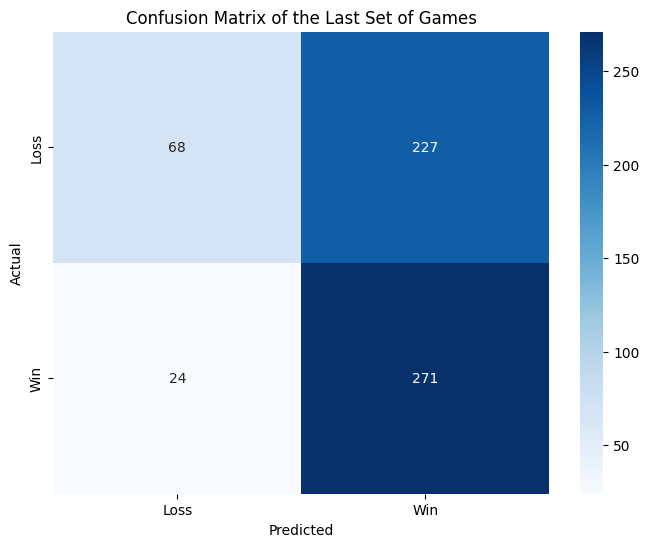

In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.metrics import accuracy_score

# Load the trained model and encoder
model = pickle.load(open('xgboost_trained_model_AdditionalFeaturesNEW.pkl', 'rb'))
encoder = pickle.load(open('encoder_AdditionalFeaturesNEW.pkl', 'rb'))

# Load the dataset
data = pd.read_csv('last2024.csv')


# Filter the games for the year needed and remove score columns
data = data[(data['Year'] == 2024) & ~data['Win'].isna()]
x_games = data.drop(['Win', 'Team1_Score', 'Team2_Score'], axis=1)
y_games_actual = data['Win'].values

# One-hot encode categorical variables
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
X_categorical = x_games[categorical_features]
X_categorical_encoded = encoder.transform(X_categorical)
feature_names = encoder.get_feature_names_out(categorical_features)
X_encoded = pd.DataFrame(X_categorical_encoded, columns=feature_names)

# Make sure that the number of rows in X_encoded matches x_games
if len(X_encoded) != len(x_games):
    raise ValueError("Mismatched number of rows after encoding.")

# Combine encoded categorical features with the rest of the dataset
x_games_final = pd.concat([x_games.drop(categorical_features, axis=1).reset_index(drop=True), X_encoded], axis=1)

# Predict the outcomes 
y_games_pred = model.predict(x_games_final)

# Make sure that the number of predictions matches the actual labels
if len(y_games_pred) != len(y_games_actual):
    raise ValueError("Mismatched number of predictions and actual outcomes.")

# Create a DataFrame for comparison
comparison_2024 = pd.DataFrame({'Actual': y_games_actual, 'Predicted': y_games_pred})

# Calculate and display the accuracy
accuracy_2024 = accuracy_score(y_games_actual, y_games_pred)
print(f"Accuracy for the Year 2024 Games: {accuracy_2024}")
print("Comparison for the Year 2024 Games:")
print(comparison_2024)

# Visualization of the Confusion Matrix
cm = confusion_matrix(y_games_actual, y_games_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Last Set of Games')
plt.show()

In [ ]:
# 0.5813559322033899 - 7 cv,  5 6 7
# 0.5745762711864407    - 5 cs, 5 6 7

Accuracy for the Year 2024 Games: 0.548
Precision: 0.6119337877312561
Recall: 0.548
F1-Score: 0.4311639049214919
Accuracy for the Year 2024 Games: 0.548
Comparison for the Year 2024 Games:
     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         1          0
4         1          0
..      ...        ...
245       0          0
246       1          0
247       1          1
248       1          0
249       0          0

[250 rows x 2 columns]


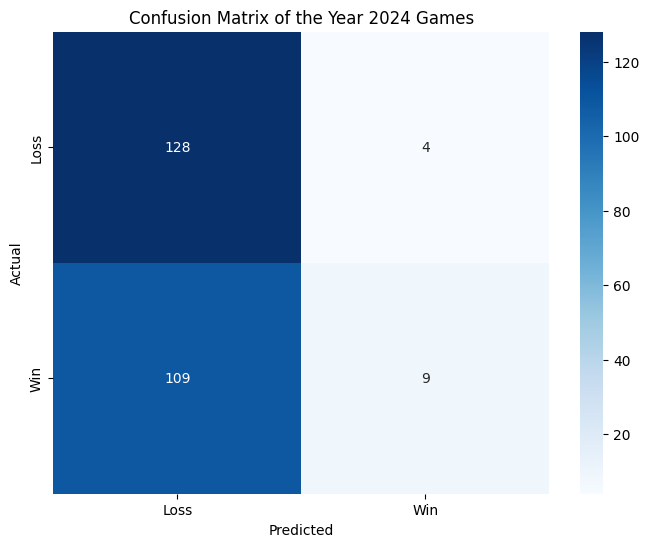

In [69]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model and encoder
model = pickle.load(open('xgboost_trained_model_AdditionalFeaturesNEW.pkl', 'rb'))
encoder = pickle.load(open('encoder_AdditionalFeaturesNEW.pkl', 'rb'))

# Load the dataset
data = pd.read_csv('last2024.csv')

# Sample 100 random games from the dataset for 2024
data_sampled = data.sample(n=250, random_state=42)
x_games = data_sampled.drop(['Win', 'Team1_Score', 'Team2_Score'], axis=1)
y_games_actual = data_sampled['Win'].values

# One-hot encode categorical variables
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
X_categorical = x_games[categorical_features].astype(str)  # Ensure categorical variables are treated as strings
X_categorical_encoded = encoder.transform(X_categorical)
feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrame for encoded features
X_encoded = pd.DataFrame(X_categorical_encoded, columns=feature_names)

# Combine encoded categorical features with the rest of the dataset
x_games_final = pd.concat([x_games.drop(categorical_features, axis=1).reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Predict the outcomes
y_games_pred = model.predict(x_games_final)

# Evaluation metrics
accuracy = accuracy_score(y_games_actual, y_games_pred)
precision = precision_score(y_games_actual, y_games_pred, average='weighted')
recall = recall_score(y_games_actual, y_games_pred, average='weighted')
f1 = f1_score(y_games_actual, y_games_pred, average='weighted')

# Display metrics
print(f"Accuracy for the Year 2024 Games: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


# Create a DataFrame for comparison
comparison_2024 = pd.DataFrame({'Actual': y_games_actual, 'Predicted': y_games_pred})

# Calculate and display the accuracy
accuracy_2024 = accuracy_score(y_games_actual, y_games_pred)
print(f"Accuracy for the Year 2024 Games: {accuracy_2024}")
print("Comparison for the Year 2024 Games:")
print(comparison_2024)


# Visualization of the Confusion Matrix
cm = confusion_matrix(y_games_actual, y_games_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Year 2024 Games')
plt.show()


In [ ]:
# Train and predict

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Fitting 9 folds for each of 729 candidates, totalling 6561 fits
Test Metrics:
Accuracy: 0.6112437594964185
ROC AUC: 0.6582754313343983
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2299
           1       0.61      0.61      0.61      2308

    accuracy                           0.61      4607
   macro avg       0.61      0.61      0.61      4607
weighted avg       0.61      0.61      0.61      4607



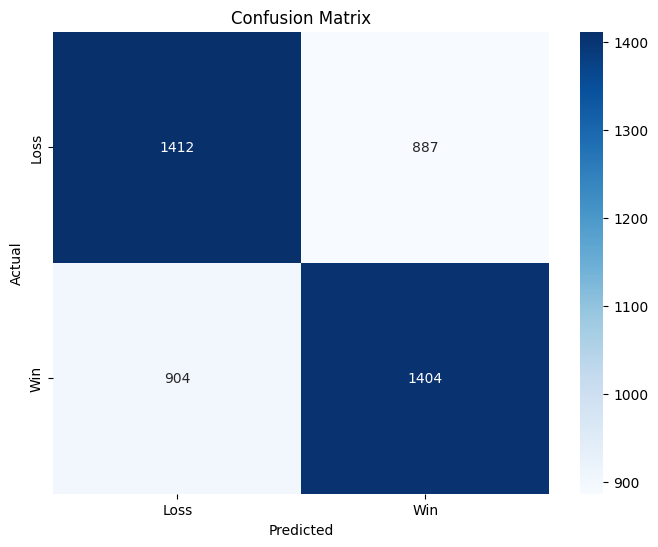

Loaded Model Test Metrics:
Accuracy: 0.6112437594964185
ROC AUC: 0.6582754313343983
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2299
           1       0.61      0.61      0.61      2308

    accuracy                           0.61      4607
   macro avg       0.61      0.61      0.61      4607
weighted avg       0.61      0.61      0.61      4607



In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('last.csv')
# Drop unnecessary columns for model training
data.drop(['Team1_Score', 'Team2_Score'], axis=1, inplace=True)

# Prepare features and target
X = data.drop('Win', axis=1)
y = data['Win']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_features = ['Type', 'Team1', 'Team2', 'OT', 'Year', 'Month']
X_categorical = encoder.fit_transform(X[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)

# Replace categorical features with their encoded versions
X_encoded = pd.DataFrame(X_categorical, columns=feature_names)
X_final = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42)

# Initialize XGBoost model for hyperparameter tuning
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
param_grid = {
    'max_depth': [5, 6, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 0.5],
    'reg_lambda': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=9, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluation on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred))

# Visualization of the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and encoder
pickle.dump(best_model, open("xgboost_trained_model_AdditionalFeaturesNEW.pkl", 'wb'))
pickle.dump(encoder, open("encoder_AdditionalFeaturesNEW.pkl", 'wb'))

# Test the model right away after training (Using the same test set as an example)
# Load the trained model and encoder
model_loaded = pickle.load(open("xgboost_trained_model_AdditionalFeaturesNEW.pkl", 'rb'))
encoder_loaded = pickle.load(open("encoder_AdditionalFeaturesNEW.pkl", 'rb'))

# Optionally, prepare a new test set or use the existing X_test, y_test
# For demonstration, using X_test directly
y_pred_loaded = model_loaded.predict(X_test)
print("Loaded Model Test Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_loaded)}")
print(f"ROC AUC: {roc_auc_score(y_test, model_loaded.predict_proba(X_test)[:, 1])}")
print(classification_report(y_test, y_pred_loaded))
